In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

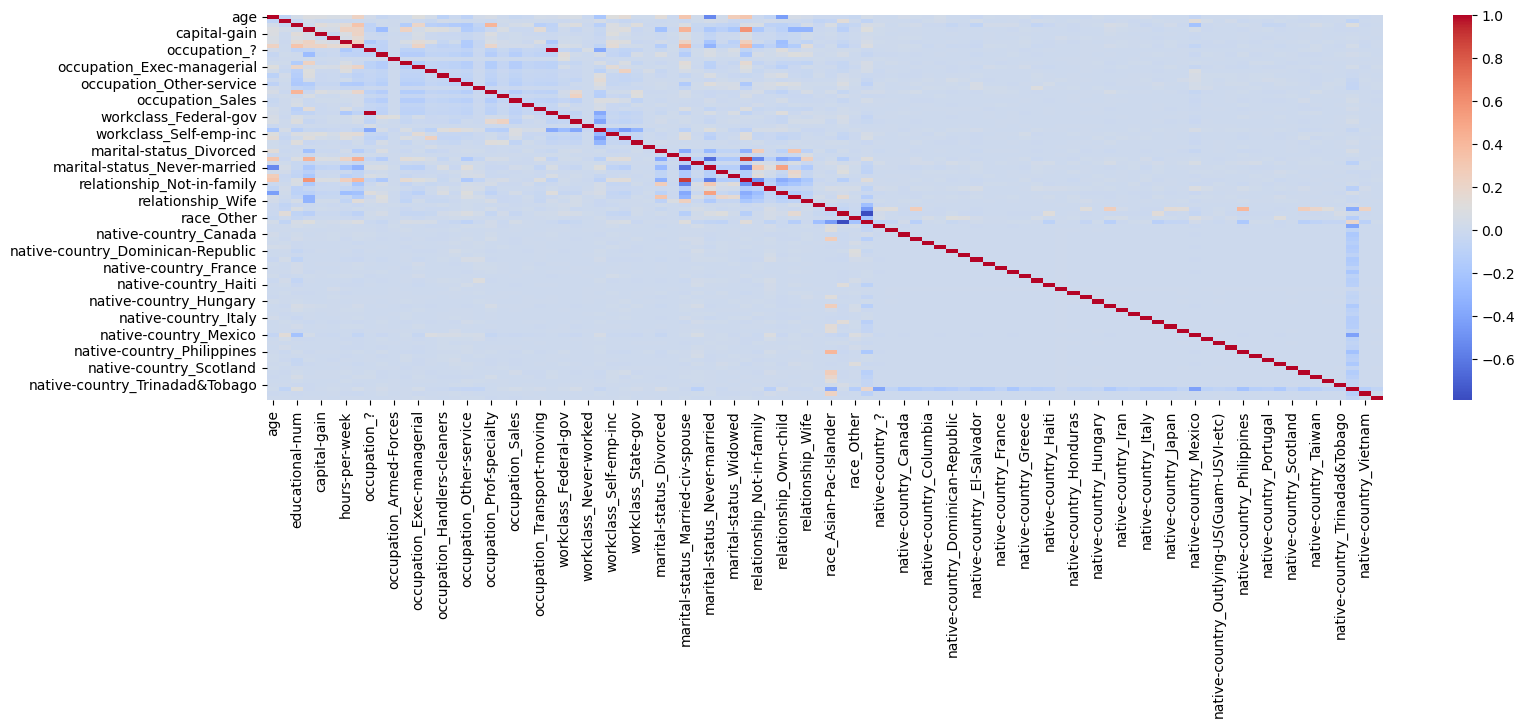

In [11]:
df = pd.read_csv("income.csv")

df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)

df = df.drop('education', axis=1)

df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


plt.figure(figsize=(18, 5))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

<AxesSubplot:>

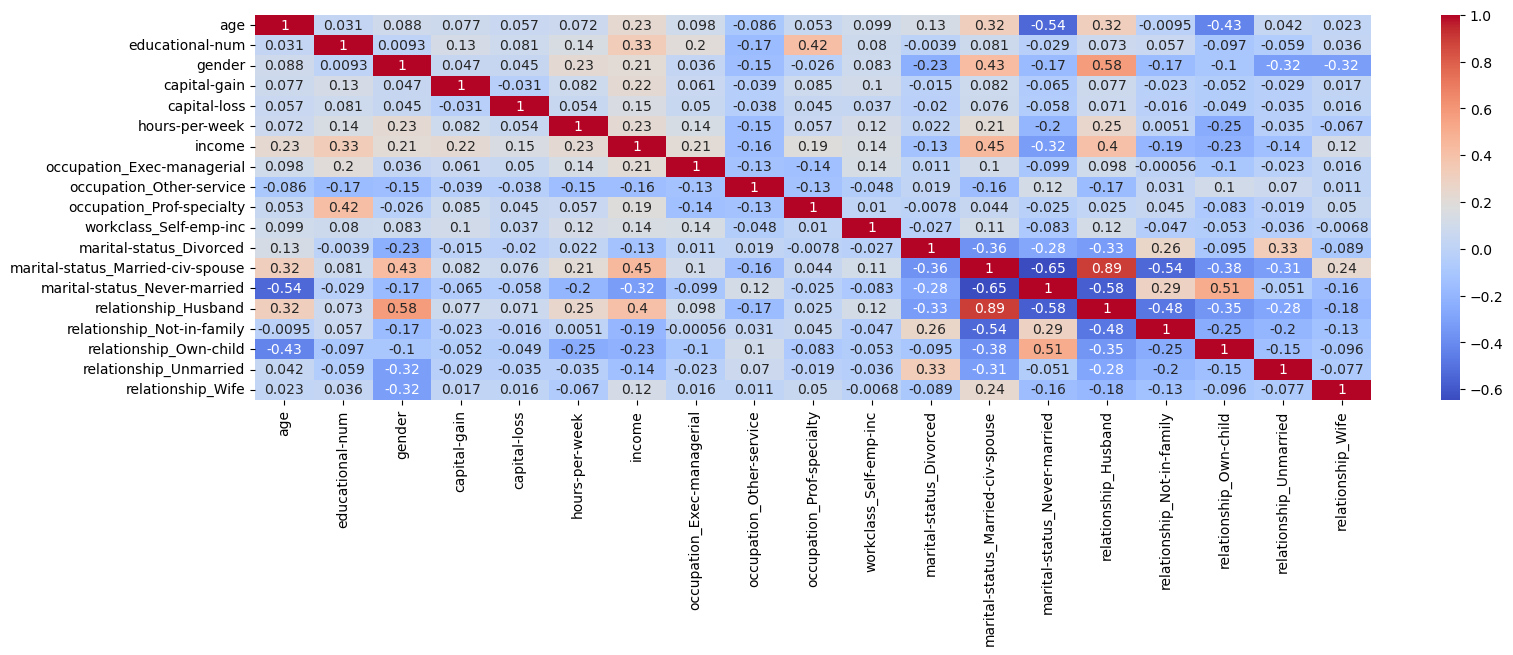

In [12]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)


plt.figure(figsize=(18, 5))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)
train_df, test_df = train_test_split(df, test_size=0.2)


train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

forest = RandomForestClassifier()
forest.fit(train_X, train_y)

forest_score = forest.score(test_X, test_y)

In [14]:
print(f'Forest Score 1: {forest_score}')

Forest Score 1: 0.8515712969597707


In [15]:
print(f'Forest Score Percentage 1: {int(forest_score * 100)}%')

Forest Score Percentage 1: 85%


In [16]:
forest.feature_importances_
forest.feature_names_in_

importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}
                     
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

                        
grid_search.fit(train_X, train_y)
grid_search.best_estimator_

forest = grid_search.best_estimator_
forest.score(test_X, test_y)


importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

forest_score_test = forest.score(test_X, test_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   1.2s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.829 total time=   1.1s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   1.1s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   1.0s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

In [17]:
print(f'Forest Score 2: {forest_score_test}')

Forest Score 2: 0.8647763332992118


In [18]:
print(f'Forest Score Percentage 2: {int(forest_score_test * 100)}%')

Forest Score Percentage 2: 86%
